In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import jax
import maze
import renderer
import os.path
import numpy as np
import levels
import utils
import matplotlib.pyplot as plt

In [9]:
image_dict = renderer.load_image_dict('image_data.pkl')

In [10]:
if os.path.exists('list_of_groups.npy'):
  list_of_groups = np.load('list_of_groups.npy')
else:
  raise RuntimeError("Missing file specifying groups for maze")


In [41]:
group_set = list_of_groups[0]
pretrain_level = levels.two_objects
train_level = levels.three_pairs_maze1
group_set = group_set[:3]
group_set

array([[26, 40],
       [47, 43],
       [25, 30]], dtype=int32)

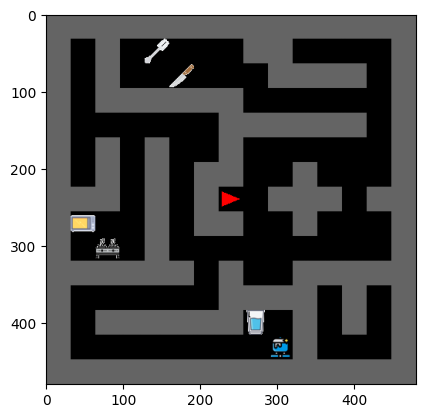

(array([[ 0,  1,  0, 47,  0,  0,  0,  1,  1,  0,  0,  0,  0],
        [ 0,  1,  0,  0, 43,  0,  0,  0,  1,  1,  1,  1,  0],
        [ 0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0],
        [ 0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0],
        [ 1,  1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1],
        [26,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0],
        [ 0, 40,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1],
        [ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0],
        [ 0,  1,  1,  1,  1,  1,  1, 25,  0,  1,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  1,  0,  0,  0]], dtype=uint8),
 array([26, 47, 25], dtype=int32))

In [42]:
train_objects = group_set[:,0]
test_objects = group_set[:,1]
map_init = utils.from_str(
    train_level,
    char_to_key=dict(
        A=group_set[0,0],
        B=group_set[0,1],
        C=group_set[1,0],
        D=group_set[1,1],
        E=group_set[2,0],
        F=group_set[2,1],
    ))


image = renderer.create_image_from_grid(
    map_init.grid, map_init.agent_pos, map_init.agent_dir, image_dict)
plt.imshow(image)
plt.show()
map_init.grid[:,:,0], train_objects

In [55]:
num_starting_locs = 4
max_starting_locs = 10
all_starting_locs = np.ones((len(group_set), max_starting_locs, 2))*-1
for idx, goal in enumerate(train_objects):
    path = utils.find_optimal_path(map_init.grid, map_init.agent_pos, np.array([goal]))
    # print(path)
    path_len = len(path)
    width = path_len//num_starting_locs
    starting_locs = np.array([path[i] for i in range(0, path_len, width)])
    all_starting_locs[idx,:len(starting_locs)] = starting_locs

list_of_reset_params = [
    maze.ResetParams(
        map_init=map_init,
        train_objects=train_objects,
        test_objects=test_objects,
        starting_locs=all_starting_locs,
    )

]

for group in group_set:
    list_of_reset_params.append(
        maze.ResetParams(
            map_init=utils.from_str(pretrain_level, char_to_key=dict(A=group[0], B=group[1])),
            train_objects=group[:1],
            test_objects=group[1:],
        )
    )

In [57]:
env_params = maze.EnvParams(
    reset_params=list_of_reset_params,
)

In [61]:
seed = 0
rng = jax.random.PRNGKey(seed)

env = maze.HouseMaze()

timestep = env.reset(env_params, seed)


AttributeError: 'EnvParams' object has no attribute 'train_objects'